In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.载入数据

In [ ]:
df = pd.read_csv('/content/drive/My Drive/核心课/6第六课：预测全家桶/L6-code核心/code/voice/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 2.数据预处理和探索

In [ ]:
df['label'] = df['label'].map(lambda x:1 if x=='male' else 0)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [ ]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [ ]:
df_corr = df.corr()

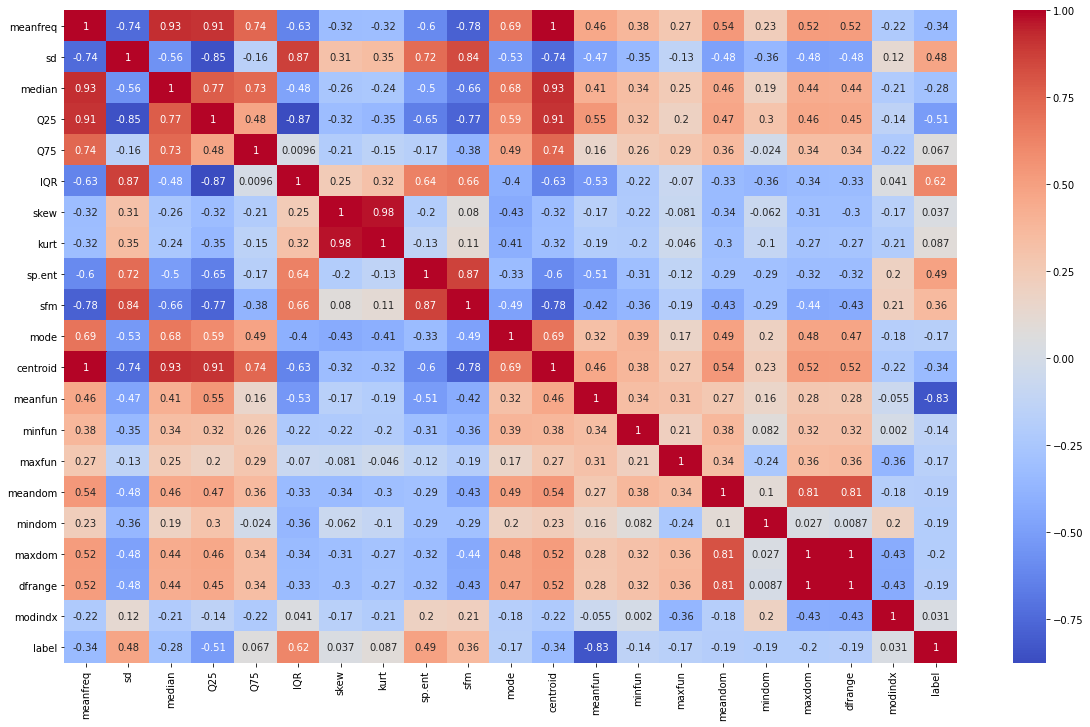

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, cmap='coolwarm', annot=True)
plt.show()

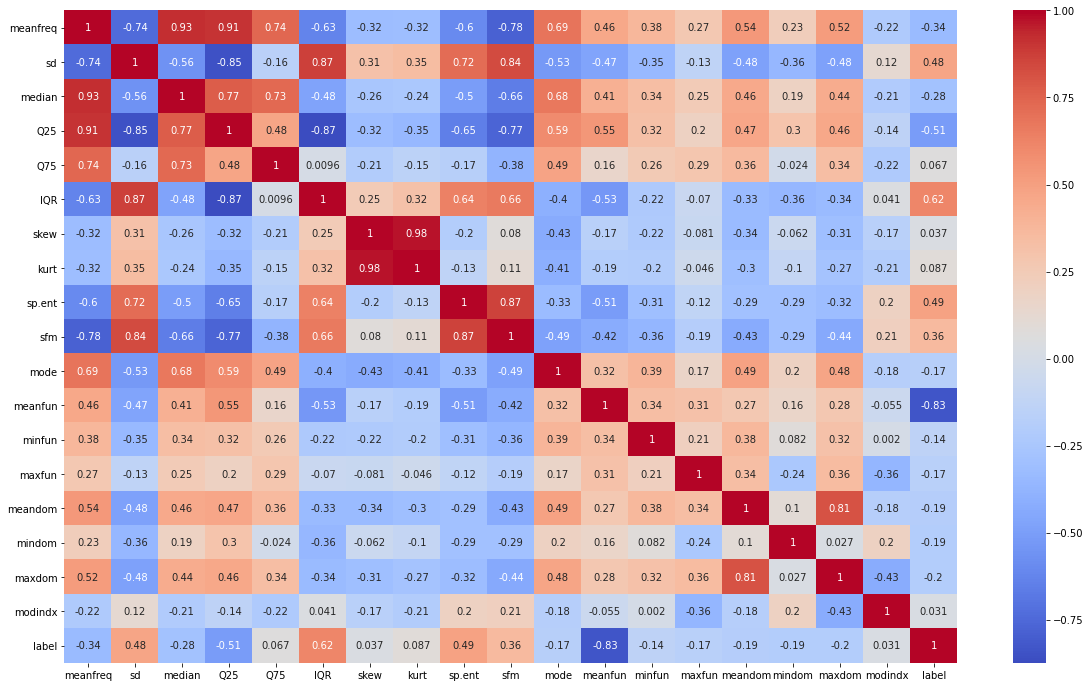

In [ ]:
## based on the heatmap, we delete the co-linear features: centroid, dfrange
df_processed = df.drop(['centroid', 'dfrange'],axis=1)
plt.figure(figsize=(20,12))
sns.heatmap(df_processed.corr(), cmap='coolwarm', annot=True)
plt.show()

## 3.准备训练数据及归一化

In [ ]:
X = df_processed.iloc[:, :-1]
y = df_processed.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 4.训练模型

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import xgboost as xgb

## lr &　svm
lr_model = LogisticRegression()
svm_model = SVC()

lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

## XGB


xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train, eval_metric='auc', eval_set=[(X_train, y_train),(X_test,y_test)],
              verbose=False, early_stopping_rounds=10)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
param = {'boosting_type':'gbdt',
                         'objective' : 'binary:logistic', #任务目标
                         'eval_metric' : 'auc', #评估指标
                         'eta' : 0.01, #学习率
                         'max_depth' : 15, #树最大深度
                         'colsample_bytree':0.8, #设置在每次迭代中使用特征的比例
                         'subsample': 0.9, #样本采样比例
                         'subsample_freq': 8, #bagging的次数
                         'alpha': 0.6, #L1正则
                         'lambda': 0, #L2正则
        }

# 读取数据
train_data = xgb.DMatrix(X_train, label=y_train)
# dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')# 读取svm数据
test_data = xgb.DMatrix(X_test, label=y_test)

xgb_model_2 = xgb.train(
    param,
    train_data,
    evals=[(train_data,'train'), (test_data,'test')],
    num_boost_round=10000,
    early_stopping_rounds=200,
    verbose_eval=False
)

In [ ]:
## lightGBM
param = {'boosting_type':'gbdt',
      'objective' : 'binary', #任务类型
      'metric' : 'auc', #评估指标
      'learning_rate' : 0.01, #学习率
      'max_depth' : 15, #树的最大深度
      'feature_fraction':0.8, #设置在每次迭代中使用特征的比例
      'bagging_fraction': 0.9, #样本采样比例
      'bagging_freq': 8, #bagging的次数
      'lambda_l1': 0.6, #L1正则
      'lambda_l2': 0, #L2正则
}

#数据加载
import lightgbm as lgb
train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test)

# 模型训练
model_lgb = lgb.train(param, train_data_lgb,
            valid_sets=[train_data_lgb, test_data_lgb],
            num_boost_round=10000,
            early_stopping_rounds=200,
            verbose_eval=False)
#                       categorical_feature=attr)

## 5.模型选择及预测

In [ ]:
def evaluate_model(model, test_x, test_y, is_bi=True):
  if is_bi:
    pred = model.predict(test_x)
    acc = accuracy_score(test_y, pred)
    f1 = f1_score(test_y, pred)
    cm = confusion_matrix(test_y, pred)
    print('Model {} evaluation: \n'.format(str(model)))
    print('Accuracy Score: {}'.format(acc))
    print('f1 Score: {}'.format(f1))
    print('Confusion Matrix: \n{}'.format(cm))
  else:
    pred = pd.Series(model.predict(test_x)).map(lambda x:1 if x>0.5 else 0)
    acc = accuracy_score(test_y, pred)
    f1 = f1_score(test_y, pred)
    cm = confusion_matrix(test_y, pred)
    print('Model {} evaluation: \n'.format(str(model)))
    print('Accuracy Score: {}'.format(acc))
    print('f1 Score: {}'.format(f1))
    print('Confusion Matrix: \n{}'.format(cm))

In [ ]:
evaluate_model(lr_model, X_test, y_test)

Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) evaluation: 

Accuracy Score: 0.9605678233438486
f1 Score: 0.9602543720190779
Confusion Matrix: 
[[307  15]
 [ 10 302]]


In [ ]:
evaluate_model(svm_model, X_test, y_test)

Model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) evaluation: 

Accuracy Score: 0.9747634069400631
f1 Score: 0.9744408945686901
Confusion Matrix: 
[[313   9]
 [  7 305]]


In [ ]:
evaluate_model(xgb_model, X_test, y_test)

Model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) evaluation: 

Accuracy Score: 0.973186119873817
f1 Score: 0.9728867623604465
Confusion Matrix: 
[[312  10]
 [  7 305]]


In [ ]:
evaluate_model(xgb_model_2, test_data, y_test, False)

Model <xgboost.core.Booster object at 0x7f7d4292d2e8> evaluation: 

Accuracy Score: 0.9842271293375394
f1 Score: 0.983974358974359
Confusion Matrix: 
[[317   3]
 [  7 307]]


In [ ]:
evaluate_model(model_lgb, X_test, y_test, False)

Model <lightgbm.basic.Booster object at 0x7f7d4291f320> evaluation: 

Accuracy Score: 0.9810725552050473
f1 Score: 0.9808917197452229
Confusion Matrix: 
[[314   6]
 [  6 308]]
